In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data1 = pd.read_csv("./output_anal/output_an_9265.csv")
data2 = pd.read_csv("./output_anal/output_h_9350.csv")
data3 = pd.read_csv("./output_anal/output_h_9355.csv")
data4 = pd.read_csv("./output_anal/output_h_9363.csv")
data5 = pd.read_csv("./output_anal/output_y_9222.csv")

C:\Users\Yohan\AppData\Local\Temp\ipykernel_43608\1766624243.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = data1.groupby('target_bins').size().reset_index(name='count')
C:\Users\Yohan\AppData\Local\Temp\ipykernel_43608\1766624243.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='target_bins', y='count', data=grouped_df, palette='viridis')


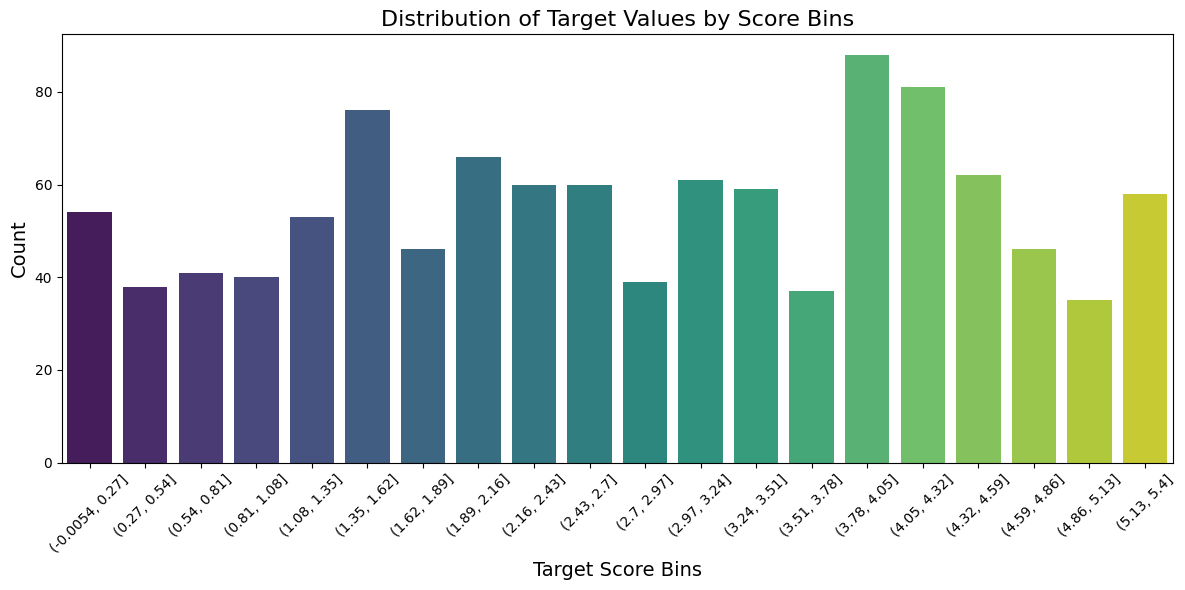

In [25]:
# 고정된 구간 설정: [-∞, 0], [0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, ∞]
bins = [-float("inf"), 0, 1, 2, 3, 4, 5, float("inf")]
labels = ["<=0", "0-1", "1-2", "2-3", "3-4", "4-5", ">5"]

# target 값을 기준으로 그룹화
df["target_bins"] = pd.cut(df["target"], bins=bins, labels=labels)

# 그룹화된 데이터프레임 생성
grouped_df = df.groupby("target_bins").size().reset_index(name="count")

# 바 플롯 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x="target_bins", y="count", data=grouped_df, palette="viridis")

# 제목과 레이블 설정
plt.title("Distribution of Target Values by Fixed Score Bins", fontsize=16)
plt.xlabel("Target Score Bins", fontsize=14)
plt.ylabel("Count", fontsize=14)

# 플롯 보여주기
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()

In [ ]:
ensemble_df = pd.DataFrame(
    {
        "id": data1["id"],
        "target": (
            data1["target"] * 0.2 + data2["target"] * 0.6 + data3["target"] * 0.2
        ),
    }
)

In [ ]:
ensemble_df.describe()
ensemble_df["target"] = ensemble_df["target"]
ensemble_df.head()
ensemble_df.to_csv("data/inference/ensemble-three.csv", index=False)